# **Given information about placement data of a batch of students in college campus, predict whether the student will be placed or not.**

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# adds the project specific libs to the sys path
import sys
from pathlib import Path

proj_lib_path = str(Path.cwd().parent / 'libs')
if proj_lib_path not in sys.path:
    sys.path. insert(1, proj_lib_path)
    print(f'added {proj_lib_path} to the sys.path')

added /Users/n0c09jf/code/github/tryml/projects/supervised1/libs to the sys.path


In [3]:
from urllib.request import urlretrieve
from supervised1.config import MODEL_DIR, DATA_DIR

import os

data_csv_fp = os.path.join(DATA_DIR, 'placementData.csv')
if not os.path.exists(data_csv_fp):
    urlretrieve('https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv', data_csv_fp) 

Read the file and Observe

In [4]:
df = pd.read_csv(data_csv_fp)
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


| Column Name | description |
|-------------|-------------|
| gender | Gender- Male='M',Female='F' |
| ssc_p | Secondary Education percentage- 10th Grade |
| ssc_b | Board of Education- Central/ Others |
| hsc_p | Higher Secondary Education percentage- 12th Grade |
| hsc_b | Board of Education- Central/ Others |
| hcs_s | Specialization in Higher Secondary Education |
| degree_p | Degree Percentage |
| degree_t | Under Graduation(Degree type)- Field of degree education |
| workex | Work Experience |


In [5]:
df['degree_t'].unique()
# df['hsc_s'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

Let's try to explore these features - Both categorical and numerical.
Check For -
1. Data types of each features
2. Missing Values
3. Unique Values
4. Encode categorical features  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Drop columns that are of no use. In our case, we have no use of sl_no

In [8]:
df = df.drop(['sl_no'], axis=1)

Can we obtain some insights on the dataset using -
1. Categorical Plots such as (not limited to)

  *   Gender comparison - *(Discussed below)*
  *   Influence of any specialization/school courses in Job
  *   Placement statistics with respect to various features

2. Correlation Matrix/ Heat maps between features

In [9]:
non_mumerical_columns = ['gender', 'ssc_b', 'hsc_s', 'hsc_b', 'degree_t', 'workex', 'specialisation']
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
target_column = 'status'

for col_name in non_mumerical_columns:
    print(df[col_name].value_counts())

gender
M    139
F     76
Name: count, dtype: int64
ssc_b
Central    116
Others      99
Name: count, dtype: int64
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64
hsc_b
Others     131
Central     84
Name: count, dtype: int64
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64
workex
No     141
Yes     74
Name: count, dtype: int64
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64


<Axes: xlabel='status', ylabel='count'>

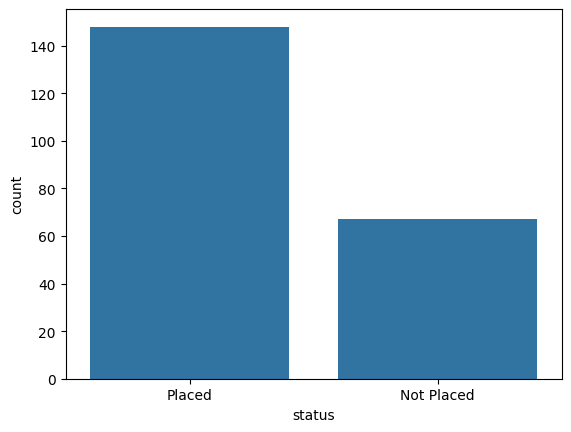

In [10]:
sns.countplot(x='status', data=df)

In [11]:
distribution_df = pd.DataFrame(df.groupby(['gender','status'])['status'].count())
print(distribution_df)

                   status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100


<Axes: xlabel='gender', ylabel='count'>

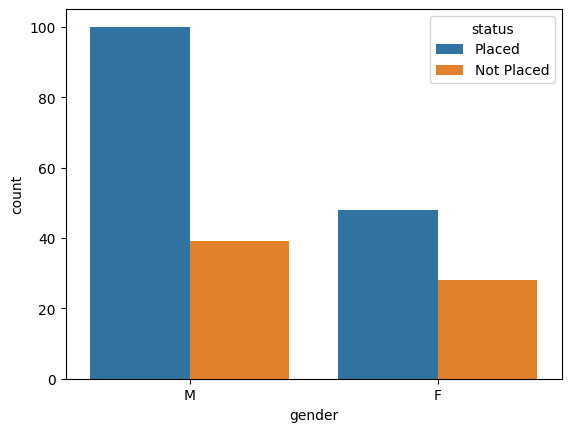

In [12]:
sns.countplot(x='gender', hue='status', data=df)
# Plotting placement stats by gender

<Axes: xlabel='workex', ylabel='count'>

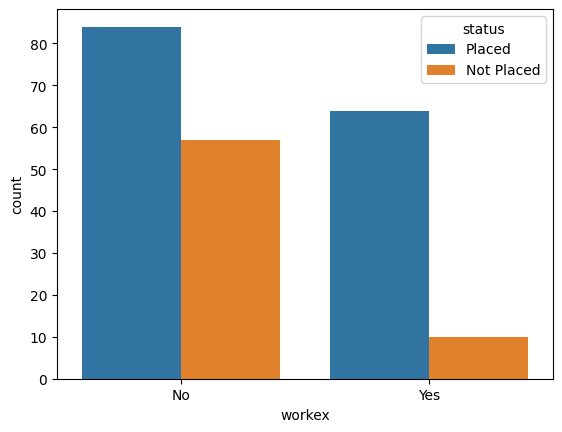

In [13]:
sns.countplot(x='workex', hue='status', data=df)
# Plotting placement stats by workex

<Axes: >

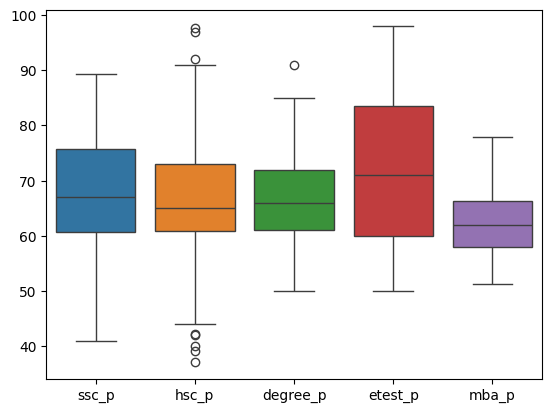

In [14]:
sns.boxplot(data=df.drop(columns=['salary']))

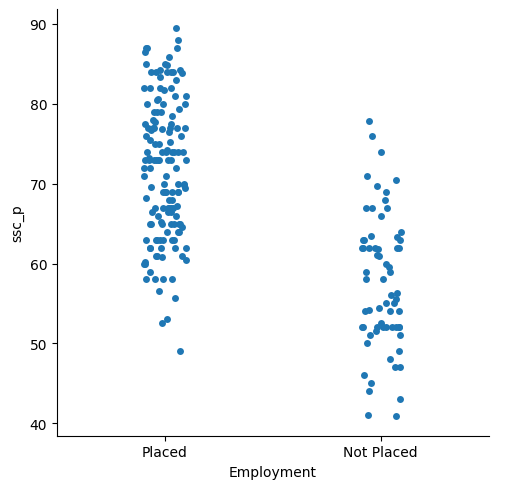

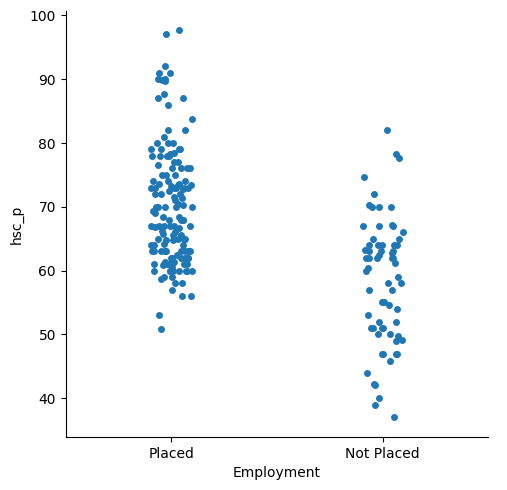

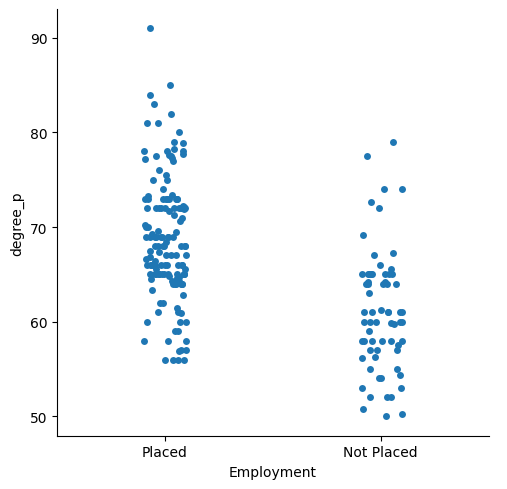

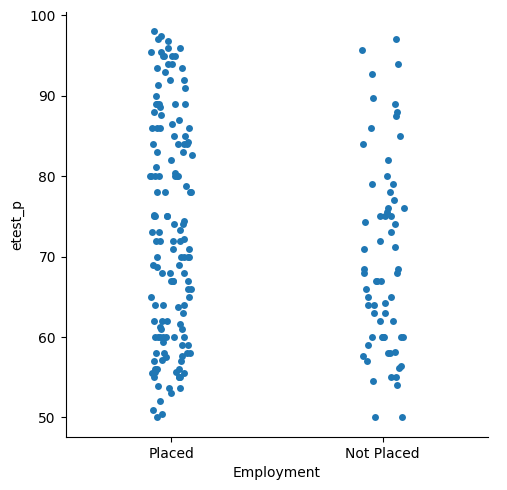

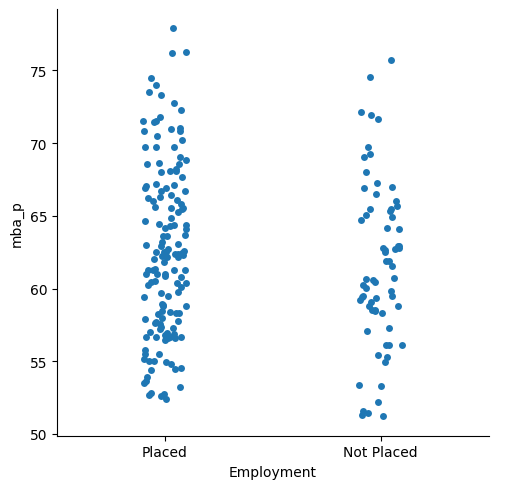

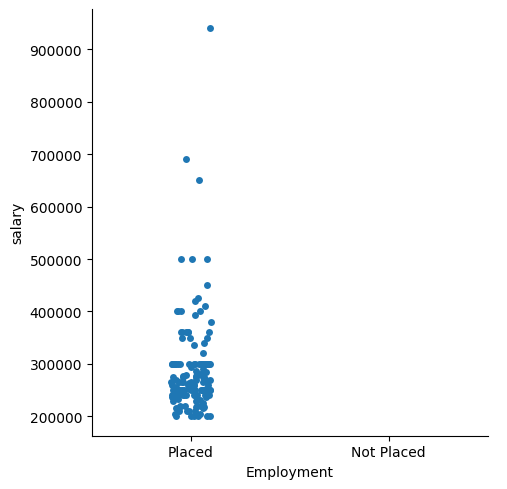

In [15]:
# Plotting Placement stats by degree percentage
for col in numerical_columns:
    sns.catplot(y=col, x=target_column, data=df)
    plt.xlabel('Employment')
    plt.ylabel(col)

Can you find some more interesting insights through this dataset ?

In [16]:
# placement based on area of study
distribution_df = pd.DataFrame(df.groupby(['hsc_s','status'])['status'].count())
print(distribution_df)

                     status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63


<Axes: xlabel='hsc_s', ylabel='count'>

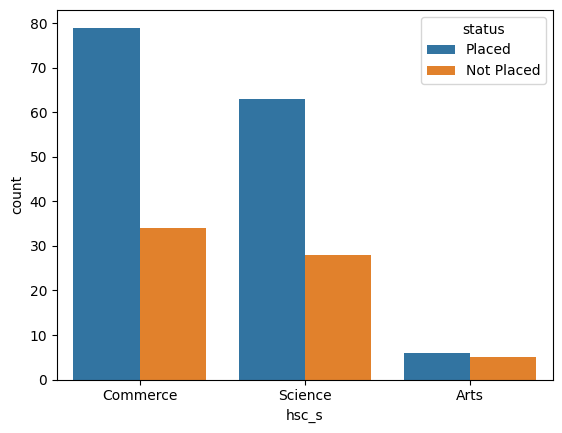

In [17]:
sns.countplot(x='hsc_s', hue='status', data=df)

**REMINDER**

Do we need any more preprocessing step ? Check if you have -

1.   Encoded all the categorical features
2.   Collinearity Test
3.   Normalisation/Standardization of features
4.   Handled all missing values, noisy inputs.





In [18]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [19]:
df[df.salary.isnull()].head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


In [20]:
print("num records", df['salary'].shape[0], ', null records', df['salary'].isnull().sum(), '\nnull ratio', df['salary'].isnull().sum() / df['salary'].shape[0])
df['salary'].describe()

num records 215 , null records 67 
null ratio 0.3116279069767442


count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

In [21]:
num_cols = numerical_columns.copy()
num_cols.remove('salary')

X = df[non_mumerical_columns + num_cols].copy()
X_one_hot = pd.get_dummies(X[non_mumerical_columns], drop_first=True, dtype=int)

X = pd.concat([X_one_hot, X[num_cols]], axis=1)

y = df[target_column].copy()
y = pd.get_dummies(y, drop_first=True, dtype=int)

X.head()


,gender_M,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,hsc_b_Others,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1,1,1,0,1,0,1,0,1,67.00,91.00,58.00,55.0,58.80
1,1,0,0,1,1,0,1,1,0,79.33,78.33,77.48,86.5,66.28
2,1,0,0,0,0,0,0,0,0,65.00,68.00,64.00,75.0,57.80
3,1,0,0,1,0,0,1,0,1,56.00,52.00,52.00,66.0,59.43
4,1,0,1,0,0,0,0,0,0,85.80,73.60,73.30,96.8,55.50


<Axes: >

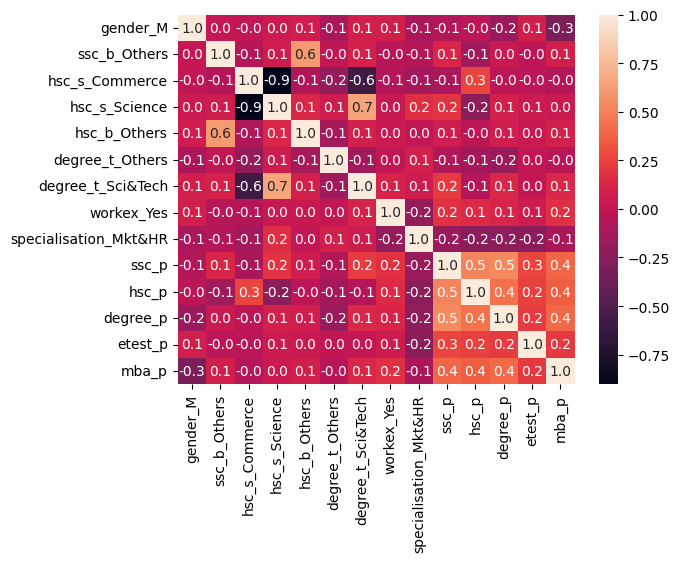

In [22]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, fmt='.1f')

In [23]:
# 1 / (1 - R^2)

def multicollinearity_by_vif(X, vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    cols_removed = []
    # Go through each column
    for i in range(len(X.columns)):

        # View which columns are left
        print(f"Columns remaining at iteration {i}: {X.columns}")

        # Calculate VIF
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s = pd.Series(index=X.columns, data=l).sort_values(ascending=False)

        # If VIF is above our threshold, eliminate the column with the highest VIF
        if s.iloc[0] > vif:
            X.drop(s.index[0],  axis=1, inplace=True)
            cols_removed.append(s.index[0])
            print('Removed: ', s.index[0],', VIF: ', s.iloc[0])
        else:
            break
    return cols_removed

# multicollinearity_by_vif(X=X_train.copy())


In [24]:
import pandas as pd

def get_outlier_bounds(data_df: pd.DataFrame, columns):
    upper_bounds = {}
    lower_bounds = {}
    for c in columns:
        q25, q75 = np.percentile(data_df[c], [25, 75])
        intr_qr = q75 - q25

        upper = q75 + 1.5 * intr_qr
        lower = q25 - 1.5 * intr_qr

        upper_bounds[c] = upper
        lower_bounds[c] = lower

    return upper_bounds, lower_bounds

OK, let's split our dataset into train-dev-test  

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from typing import Tuple

def generate_datasets(
        X: pd.DataFrame, y: pd.DataFrame, 
        test_size=0.2, shuffle=True, sampling_fn=None
) -> Tuple[pd.DataFrame, pd.DataFrame, np.array, np.array]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=shuffle)

    if sampling_fn:
        X_train, y_train = sampling_fn(X_train, y_train)
    y_train_true = y_train.to_numpy().squeeze()
    y_test_true = y_test.to_numpy().squeeze()

    if num_cols:
        std_scaler = StandardScaler()
        std_scaler.fit(X_train[num_cols])
        X_train[num_cols] = std_scaler.transform(X_train[num_cols])
        X_test[num_cols] = std_scaler.transform(X_test[num_cols])

    X_train_final = X_train.drop(['hsc_s_Commerce', 'hsc_s_Science'], axis=1)
    X_test_final = X_test.drop(['hsc_s_Commerce', 'hsc_s_Science'], axis=1)

    # X_final = X_train.copy()
    cols_removed = multicollinearity_by_vif(X=X_train_final, vif=10)
    print("cols removed due to multicollinearity", cols_removed)
    if cols_removed:
        X_test_final.drop(cols_removed, axis=1, inplace=True)
            
    print("final: train shape", X_train_final.shape, "test shape", X_test_final.shape)
    return X_train_final, X_test_final, y_train_true, y_test_true

In [32]:
from sklearn.decomposition import PCA

X_train_pca, X_test_pca, y_train_pca_true, y_test_pca_true = generate_datasets(X, y)

if num_cols:
    std_scaler = StandardScaler()
    std_scaler.fit(X_train_pca[num_cols])
    X_train_pca[num_cols] = std_scaler.transform(X_train_pca[num_cols])
    X_test_pca[num_cols] = std_scaler.transform(X_test_pca[num_cols])

pca = PCA(n_components=0.99)
pca.fit(X_train_pca)

X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)
print('pca shape: ', X_train_pca.shape)

Columns remaining at iteration 0: Index(['gender_M', 'ssc_b_Others', 'hsc_b_Others', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_Yes', 'specialisation_Mkt&HR', 'ssc_p',
       'hsc_p', 'degree_p', 'etest_p', 'mba_p'],
      dtype='object')
cols removed due to multicollinearity []
final: train shape (172, 12) test shape (43, 12)
pca shape:  (172, 11)


Import your classification model of choice, fit the model on training set

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train_true, y_test_true = generate_datasets(X, y)

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train_true, cv=5, scoring='accuracy')
print('accuracy: ', scores.mean())

lr_pca = LogisticRegression()
scores = cross_val_score(lr_pca, X_train_pca, y_train_pca_true, cv=5, scoring='accuracy')
print('accuracy (using pca): ', scores.mean())

Columns remaining at iteration 0: Index(['gender_M', 'ssc_b_Others', 'hsc_b_Others', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_Yes', 'specialisation_Mkt&HR', 'ssc_p',
       'hsc_p', 'degree_p', 'etest_p', 'mba_p'],
      dtype='object')
cols removed due to multicollinearity []
final: train shape (172, 12) test shape (43, 12)
accuracy:  0.8779831932773108
accuracy (using pca):  0.8779831932773108


Let's try to measure performance using -
1. Confusion Matrix
2. Accuracy
3. Precision
4. Recall
5. ROC Curve
6. AUC to Compare the performance of classification algorithms used
7. Precision Recall Curve  

Test Accuracy: 0.8372093023255814
Test Precision: 0.9
Test Recall: 0.8709677419354839


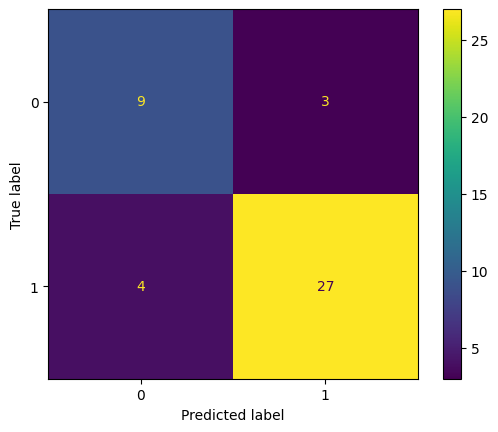

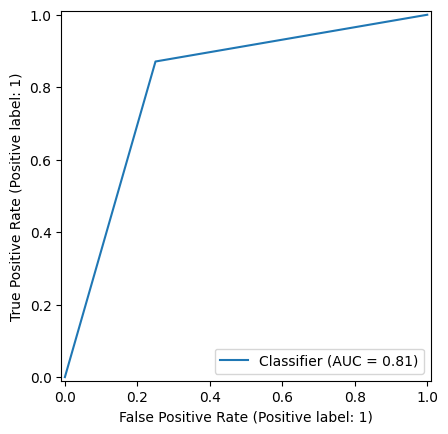

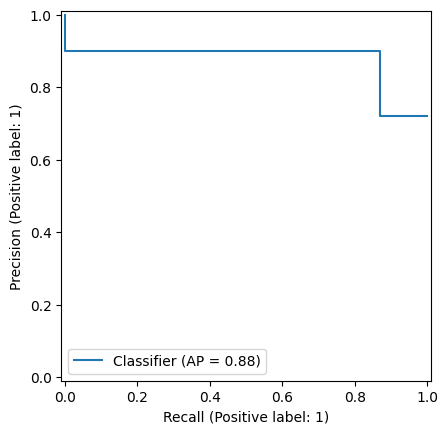

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import FixedThresholdClassifier

lr_05 = FixedThresholdClassifier(lr, threshold=0.5)
lr_05.fit(X_train, y_train_true)

y_test_pred = lr_05.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test_true, y_test_pred))
print('Test Precision:', precision_score(y_test_true, y_test_pred))
print('Test Recall:', recall_score(y_test_true, y_test_pred))

_ = ConfusionMatrixDisplay.from_predictions(y_test_true, y_test_pred)
_ = RocCurveDisplay.from_predictions(y_test_true, y_test_pred)
_ = PrecisionRecallDisplay.from_predictions(y_test_true, y_test_pred)

Accuracy: 0.8837209302325582
Precision: 0.90625
Recall: 0.9354838709677419


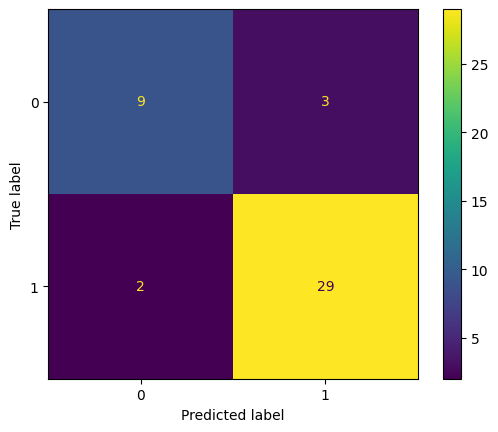

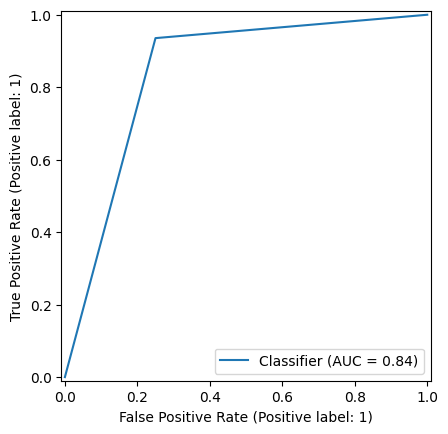

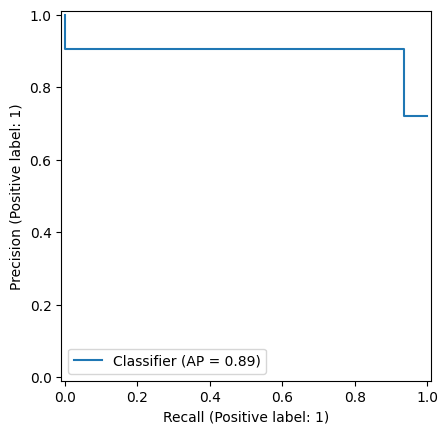

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import FixedThresholdClassifier


lr_05 = FixedThresholdClassifier(lr_pca, threshold=0.5)
lr_05.fit(X_train_pca, y_train_pca_true)

y_test_pca_pred = lr_05.predict(X_test_pca)
print('Test Accuracy (pca):', accuracy_score(y_test_pca_true, y_test_pca_pred))
print('Test Precision (pca):', precision_score(y_test_pca_true, y_test_pca_pred))
print('Test Recall (pca):', recall_score(y_test_pca_true, y_test_pca_pred))

_ = ConfusionMatrixDisplay.from_predictions(y_test_pca_true, y_test_pca_pred)
_ = RocCurveDisplay.from_predictions(y_test_pca_true, y_test_pca_pred)
_ = PrecisionRecallDisplay.from_predictions(y_test_pca_true, y_test_pca_pred)

How can we check if our model is overfitting on the dataset ? What about outliers, are they affecting our model's performance ?


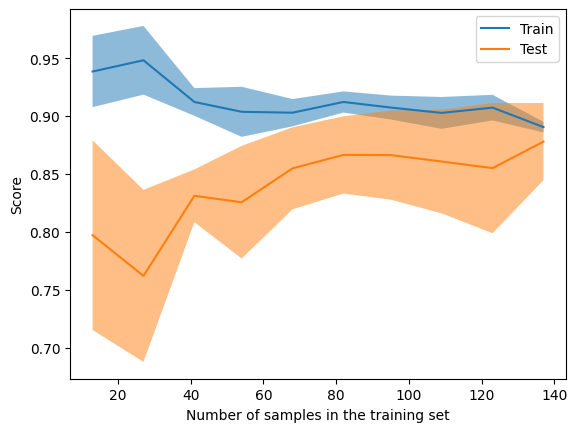

In [36]:
from sklearn.model_selection import LearningCurveDisplay
lr = LogisticRegression()

_ = LearningCurveDisplay.from_estimator(
   lr, X_train, y_train_true, train_sizes=np.linspace(0.1, 1, num=10, dtype=float), cv=5)

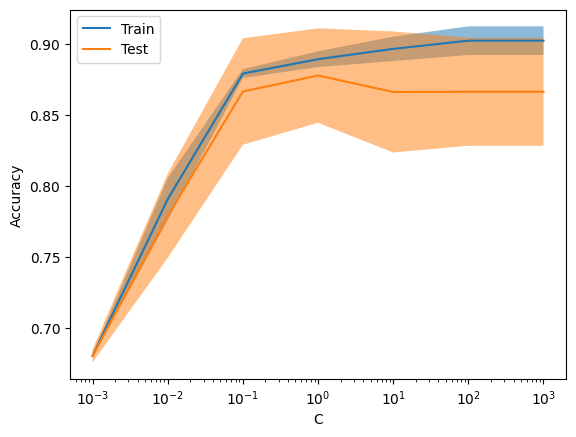

In [37]:
from sklearn.model_selection import ValidationCurveDisplay

lr = LogisticRegression()

param_name, param_range = "C", [0.001,0.01,0.1,1,10,100,200,500,1000]
_ = ValidationCurveDisplay.from_estimator(
   lr, X_train, y_train_true, param_name=param_name, param_range=param_range, scoring='accuracy', cv=5)


# Over sampling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE, ADASYN


def smote_sample(X, y):
 return SMOTE().fit_resample(X, y)

def adasyn_sample(X, y):
 return ADASYN().fit_resample(X, y)

X_train, X_test, y_train_true, y_test_true = generate_datasets(X, y, sampling_fn=smote_sample)

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train_true, cv=5, scoring='accuracy')
print('val accuracy: ', scores.mean())

lr.fit(X_train, y_train_true)
print('test accuracy: ', accuracy_score(lr.predict(X_test), y_test_true))


X_train, X_test, y_train_true, y_test_true = generate_datasets(X, y, sampling_fn=adasyn_sample)

lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train_true, cv=5, scoring='accuracy')
print('accuracy: ', scores.mean())

lr.fit(X_train, y_train_true)
print('test accuracy: ', accuracy_score(lr.predict(X_test), y_test_true))

Columns remaining at iteration 0: Index(['gender_M', 'ssc_b_Others', 'hsc_b_Others', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_Yes', 'specialisation_Mkt&HR', 'ssc_p',
       'hsc_p', 'degree_p', 'etest_p', 'mba_p'],
      dtype='object')
cols removed due to multicollinearity []
final: train shape (234, 12) test shape (43, 12)
val accuracy:  0.8546716003700278
test accuracy:  0.8372093023255814
Columns remaining at iteration 0: Index(['gender_M', 'ssc_b_Others', 'hsc_b_Others', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_Yes', 'specialisation_Mkt&HR', 'ssc_p',
       'hsc_p', 'degree_p', 'etest_p', 'mba_p'],
      dtype='object')
cols removed due to multicollinearity []
final: train shape (239, 12) test shape (43, 12)
accuracy:  0.8745567375886525
test accuracy:  0.8604651162790697
